# CMP223 Data Analysis

TODO escrever aqui as coisas bonitas

This notebook yada yada etc

The .csv file with the energy measurements etc
This file is generated with the `./snmp_energy_monitor.sh` script making snmp requests to the PDU suplying energy to the partition--the poti partition in the PDU 123, in this case. The format is "date,Energy,ActivePower":

	date: YYYY-MM-DD hh:mm:ss
	Energy: cumulative value. integer, Wh
	Active Power: the usable or consumed electrical energy in an AC circuit. integer, W

## Idle experiment

In this experiment, we allocated the complete poti partition for a period of time and did nothing :) These measurements ran for a few hours, in two differents days. Let's take a look at them:

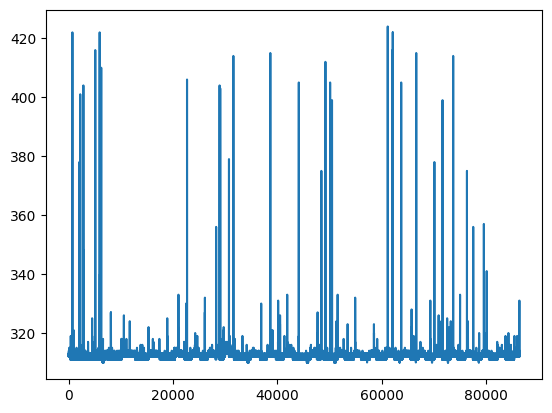

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

idle_1 = pd.read_csv('./data/idle_poti/energy_monitor_123_2025-09-10.csv', usecols=['Time', 'Energy', 'Active_Power'])
idle_2 = pd.read_csv('./data/idle_poti/energy_monitor_123_2025-09-15.csv', usecols=['Time', 'Energy', 'Active_Power'])

# Convering the 'Time' column to datetime format, and adding a fourth column with the elapsed time since the beggining of the measurements
idle_1['Time'] = pd.to_datetime(idle_1['Time'], format='%Y-%m-%d %H:%M:%S')
idle_1['Elapsed'] = idle_1['Time'].sub(idle_1['Time'].iloc[0])
idle_1['Elapsed'] = idle_1['Elapsed'].dt.seconds

idle_2['Time'] = pd.to_datetime(idle_2['Time'], format='%Y-%m-%d %H:%M:%S')
idle_2['Elapsed'] = idle_2['Time'].sub(idle_2['Time'].iloc[0])
idle_2['Elapsed'] = idle_2['Elapsed'].dt.seconds

# Visualizing the data first
#idle_2.plot(x="Elapsed", y="Active_Power")
#idle_2.describe()
fig, ax = plt.subplots()
ax.plot(idle_2['Elapsed'], idle_2['Active_Power'])
plt.show()



## Stress experiment

TODO completar aqui dps
Importing the stress experiment data
Explanation about the stress experiment and the stress package we're using

    time: total runtime of the experiment
    factors:
        cpu:
        io:
        memory:
        nodes:
    exp:
    order:
    start_ts:
    end_ts:

In [1]:
experiment = pd.read_csv("./data/stress_poti_5_nodes_735647/stress_poti_5_nodes_735647_output.csv", usecols=["time","cpu","io","memory","nodes","exp","order","start_ts","end_ts"])
experiment = experiment.reset_index()  # make sure indexes pair with number of rows

experiment["start_ts"] = pd.to_datetime(experiment["start_ts"], format="%Y-%m-%d %H:%M:%S")
experiment["end_ts"] = pd.to_datetime(experiment["end_ts"], format="%Y-%m-%d %H:%M:%S")

experiment.head()

,index,time,cpu,io,memory,nodes,exp,order,start_ts,end_ts
0,0,5m,8,8,8,3,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU8_IO8_MEM8_N3_1,2025-11-25 17:15:33,2025-11-25 17:20:33
1,1,5m,12,12,0,3,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU12_IO12_MEM0_N3_2,2025-11-25 17:21:03,2025-11-25 17:26:03
2,2,5m,0,24,0,5,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU0_IO24_MEM0_N5_3,2025-11-25 17:26:33,2025-11-25 17:31:33
3,3,5m,0,12,12,4,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU0_IO12_MEM12_N4_4,2025-11-25 17:32:03,2025-11-25 17:37:04
4,4,5m,8,8,8,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU8_IO8_MEM8_N1_5,2025-11-25 17:37:34,2025-11-25 17:42:34


In [2]:
df = pd.read_csv("./data/stress_poti_5_nodes_735647/energy_monitor_123_stress_5_nodes.csv", usecols=["Time", "Energy", "Active_Power"])

df["Time"] = pd.to_datetime(df["Time"], format="%Y-%m-%d %H:%M:%S")
df["Elapsed"] = df["Time"].sub(df["Time"].iloc[0])
df["Elapsed"] = df["Elapsed"].dt.seconds
df["Accumulated"] = df["Energy"].diff()

df.head()

,Time,Energy,Active_Power,Elapsed,Accumulated
0,2025-11-25 17:10:00,7415248,436,0,NaN
1,2025-11-25 17:10:00,7415248,436,0,0.0
2,2025-11-25 17:10:00,7415248,436,0,0.0
3,2025-11-25 17:10:00,7415248,436,0,0.0
4,2025-11-25 17:10:00,7415248,436,0,0.0


<Axes: xlabel='Time'>

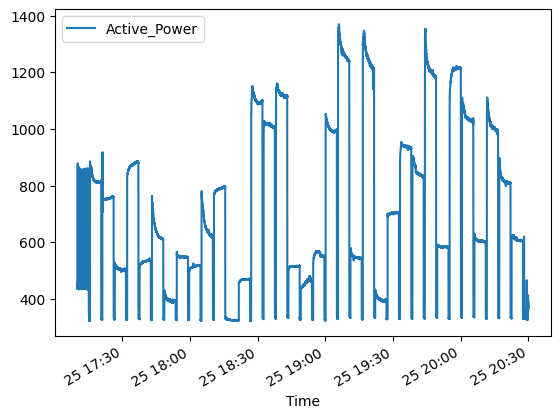

In [3]:
df.plot(x="Time", y="Active_Power")

Now we need to slice the csv with the results so we can have a separate plot for each experiment. Note: the `iterrows` function [is very slow](https://pandas.pydata.org/docs/user_guide/basics.html#iteration) and we only use it because we have a small list of experiments. For bigger lists we should use [something else](https://stackoverflow.com/questions/16476924/how-can-i-iterate-over-rows-in-a-pandas-dataframe/77270285#77270285).

In [4]:
results = list()

for index, row in experiment.iterrows():
    # print(row['start_ts'], row['end_ts'])
    start_time = row['start_ts']
    end_time = row['end_ts']

    # df[[df['Time'] >= start_time] and [df['Time'] <= end_time)]
    results.append(df.loc[(df['Time']>=start_time) & (df['Time']<=end_time)])
